In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import roc_auc_score, make_scorer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from sklearn.preprocessing import OrdinalEncoder

In [22]:
df = pd.read_csv('Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df = df.iloc[:,1:]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


C:\Users\rohit\AppData\Local\Temp\ipykernel_20540\3320708779.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
C:\Users\rohit\AppData\Local\Temp\ipykernel_20540\3320708779.py:8: UserWarning: 
The palette list has fewer values (4) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)


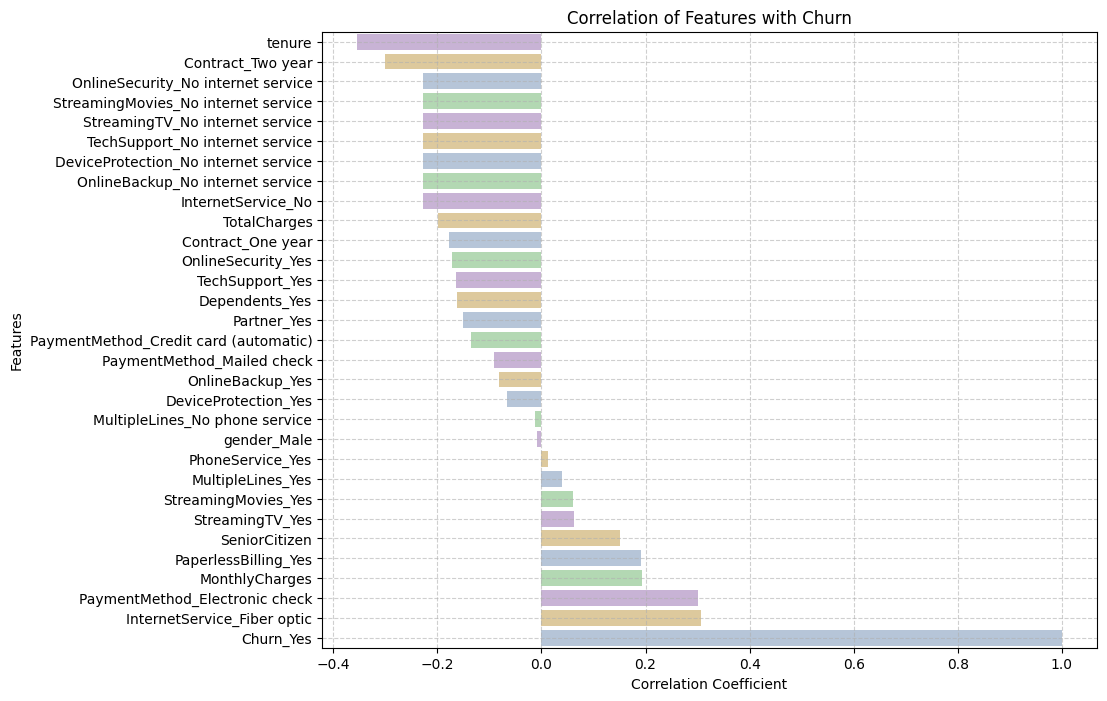

In [25]:
corr_matrix = df_encoded.corr()

churn_corr = corr_matrix['Churn_Yes'].sort_values()

color_palette = ['#c9addb', '#e8cd92', '#B0C4DE', '#addead']

plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

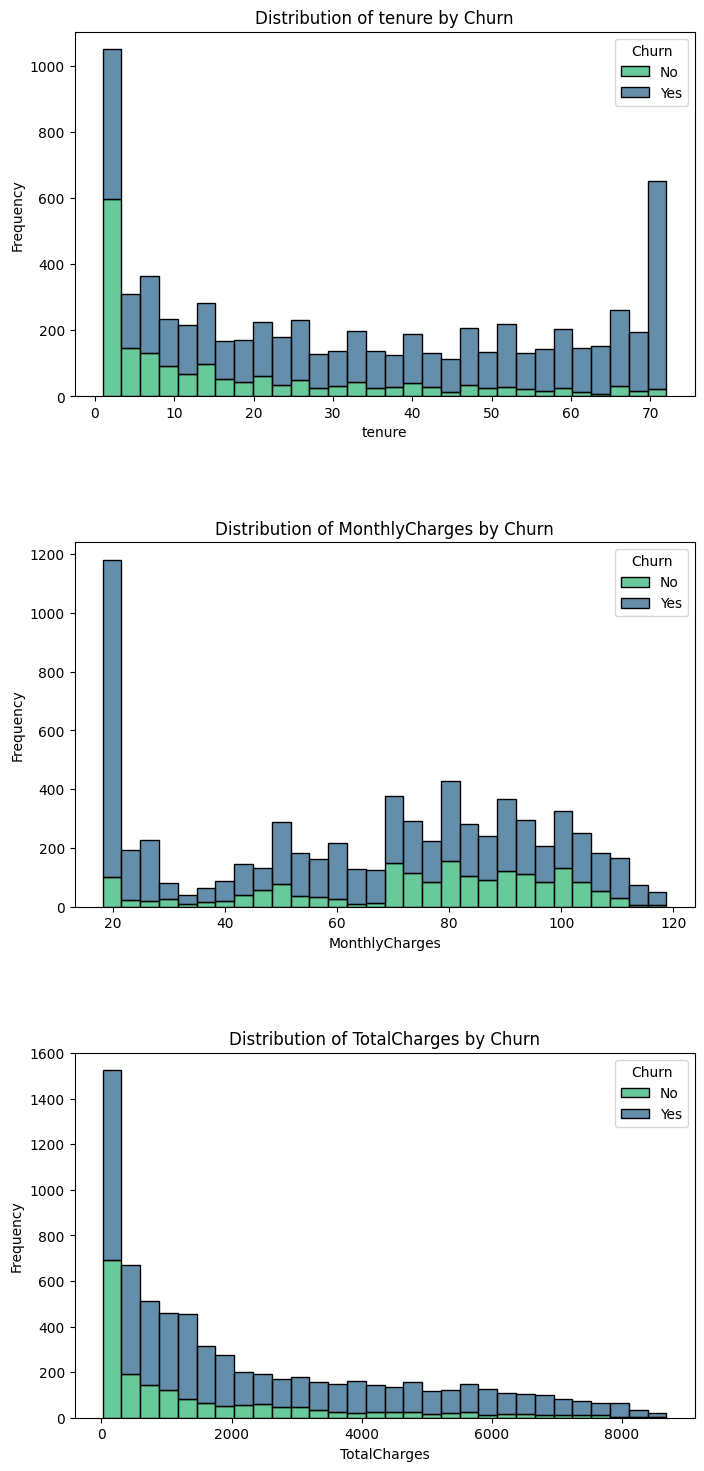

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.show()

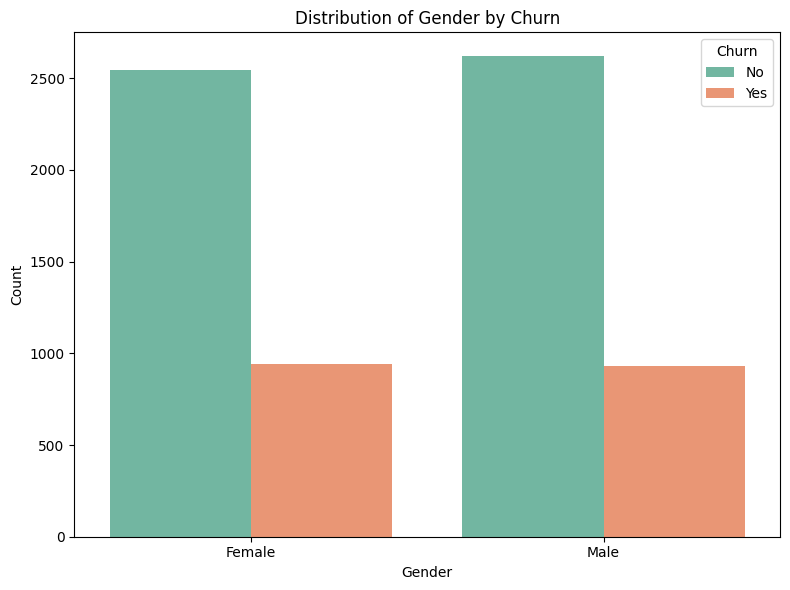

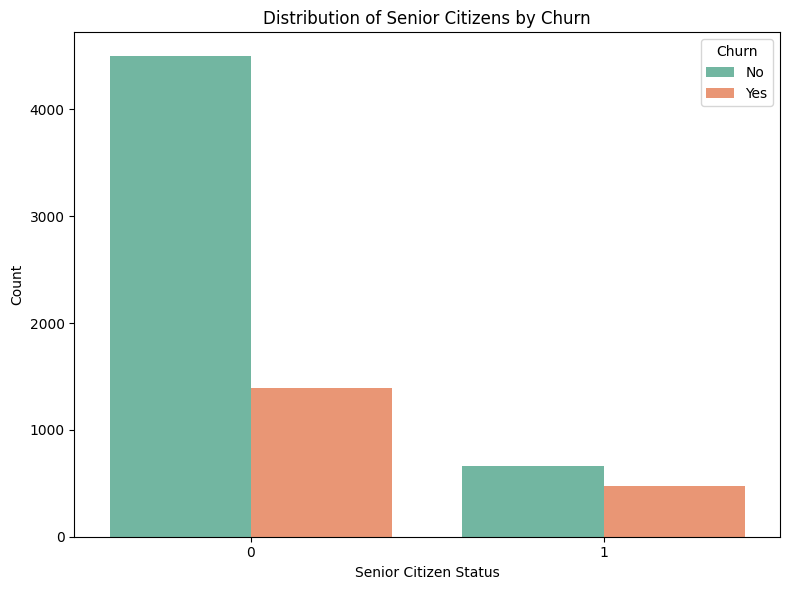

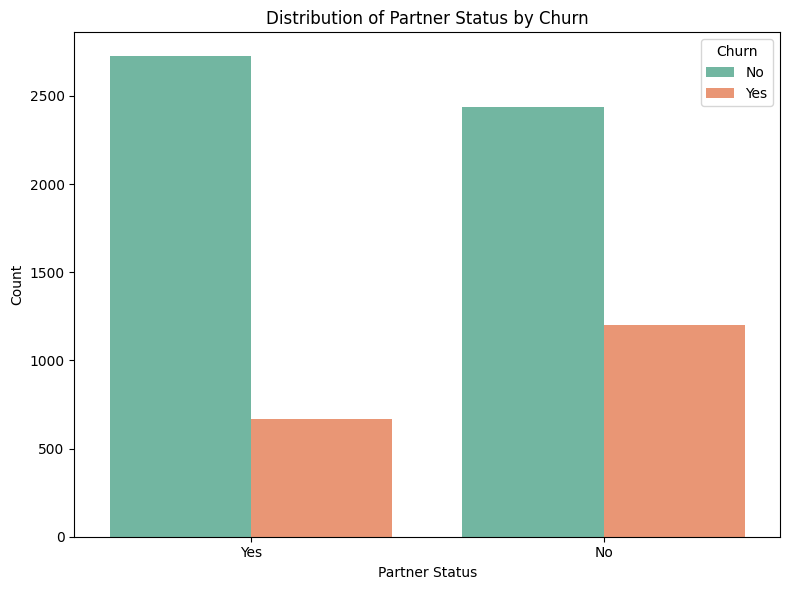

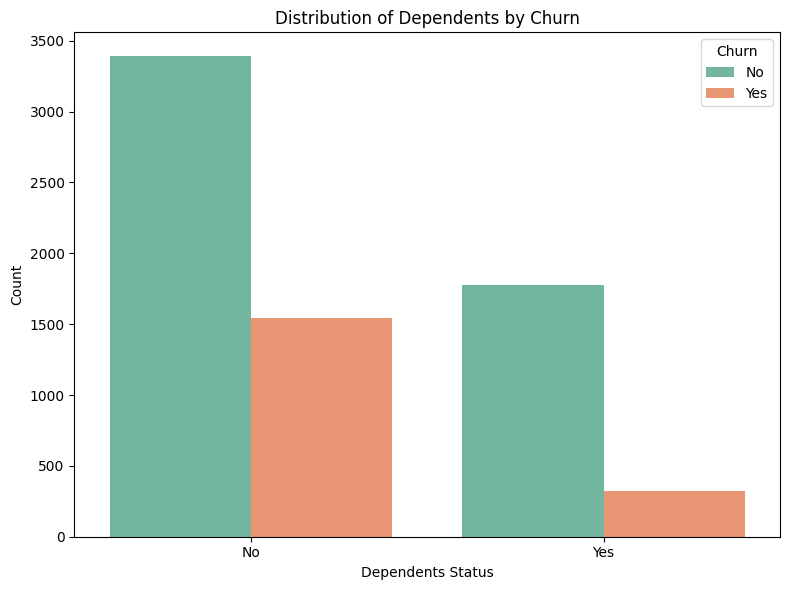

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution by Churn
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df, ax=ax, palette='Set2')
ax.set_title('Distribution of Gender by Churn')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Senior Citizen distribution by Churn
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=ax, palette='Set2')
ax.set_title('Distribution of Senior Citizens by Churn')
ax.set_xlabel('Senior Citizen Status')
ax.set_ylabel('Count')
ax.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Partner distribution by Churn
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=df, ax=ax, palette='Set2')
ax.set_title('Distribution of Partner Status by Churn')
ax.set_xlabel('Partner Status')
ax.set_ylabel('Count')
ax.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Dependents distribution by Churn
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Churn', data=df, ax=ax, palette='Set2')
ax.set_title('Distribution of Dependents by Churn')
ax.set_xlabel('Dependents Status')
ax.set_ylabel('Count')
ax.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


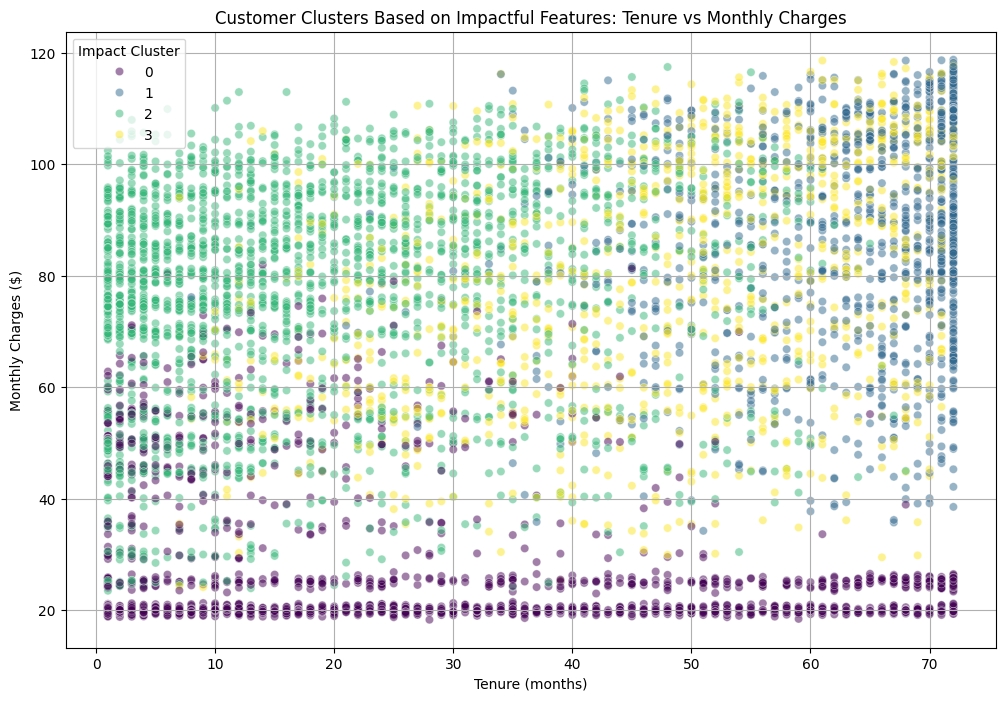

In [8]:
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
data_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Including the numerical columns
impactful_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].join(data_encoded)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(impactful_features)

# Applying K-means clustering
kmeans_impact = KMeans(n_clusters=4, random_state=42)
clusters_impact = kmeans_impact.fit_predict(features_scaled)

# Adding the cluster labels to the original data
df['Impact_Cluster'] = clusters_impact

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Impact_Cluster', palette='viridis', data=df, alpha=0.5)
plt.title('Customer Clusters Based on Impactful Features: Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Impact Cluster')
plt.grid(True)
plt.show()

In [9]:
churn_counts = df.groupby(['Impact_Cluster', 'Churn']).size().unstack(fill_value=0)


In [10]:
categorical = df.select_dtypes("object")
encoder = OrdinalEncoder().fit(categorical)
encoded = encoder.transform(categorical)
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [11]:
number = df.select_dtypes("number").reset_index(drop=True)
cate = pd.DataFrame(encoded.astype("int64"),columns=categorical.columns).reset_index(drop=True)
df = pd.concat([number,cate],axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Impact_Cluster,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,2,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,3,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,0,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,3,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


In [12]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

X_train_norm = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test_norm = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))

X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

In [13]:
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(SimpleRNN(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [18]:
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X))

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

In [20]:
keras_wrapper = KerasClassifierWrapper(create_model)

param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train_norm, Y_train)

best_params = grid_result.best_params_

final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train_norm, Y_train)

Y_pred = final_model.predict(X_test_norm)

65/65 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7957405614714425


In [21]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for LSTM Model:", roc_auc)

ROC-AUC Score for LSTM Model: 0.9030867616367391


65/65 [==============================] - 1s 5ms/step


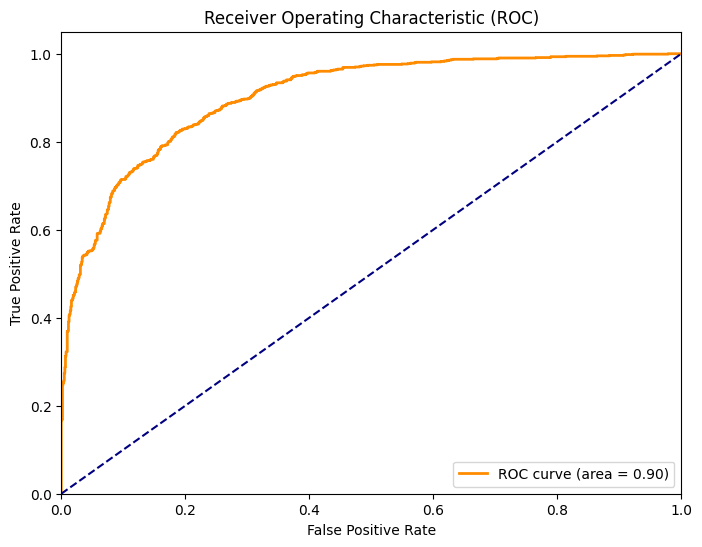

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
Y_probs = final_model.predict(X_test_norm)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
